# 1 - Basics on Data Analysis + PCA

In [1]:
from pydoc import help # can type in the python console `help(name of function)` to get the documentation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
# figures inline in notebook
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)


Source of data: https://archive.ics.uci.edu/

In [2]:
#import os
#print(os.listdir("../aulas/input/"))
#data=pd.read_csv("../aulas/input/Wine.csv")
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
X = data.loc[:, "V2":] # independent variables data
y = data.V1 # dependednt variable data
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      178 non-null    int64  
 1   V2      178 non-null    float64
 2   V3      178 non-null    float64
 3   V4      178 non-null    float64
 4   V5      178 non-null    float64
 5   V6      178 non-null    int64  
 6   V7      178 non-null    float64
 7   V8      178 non-null    float64
 8   V9      178 non-null    float64
 9   V10     178 non-null    float64
 10  V11     178 non-null    float64
 11  V12     178 non-null    float64
 12  V13     178 non-null    float64
 13  V14     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Plotting Multivariate Data


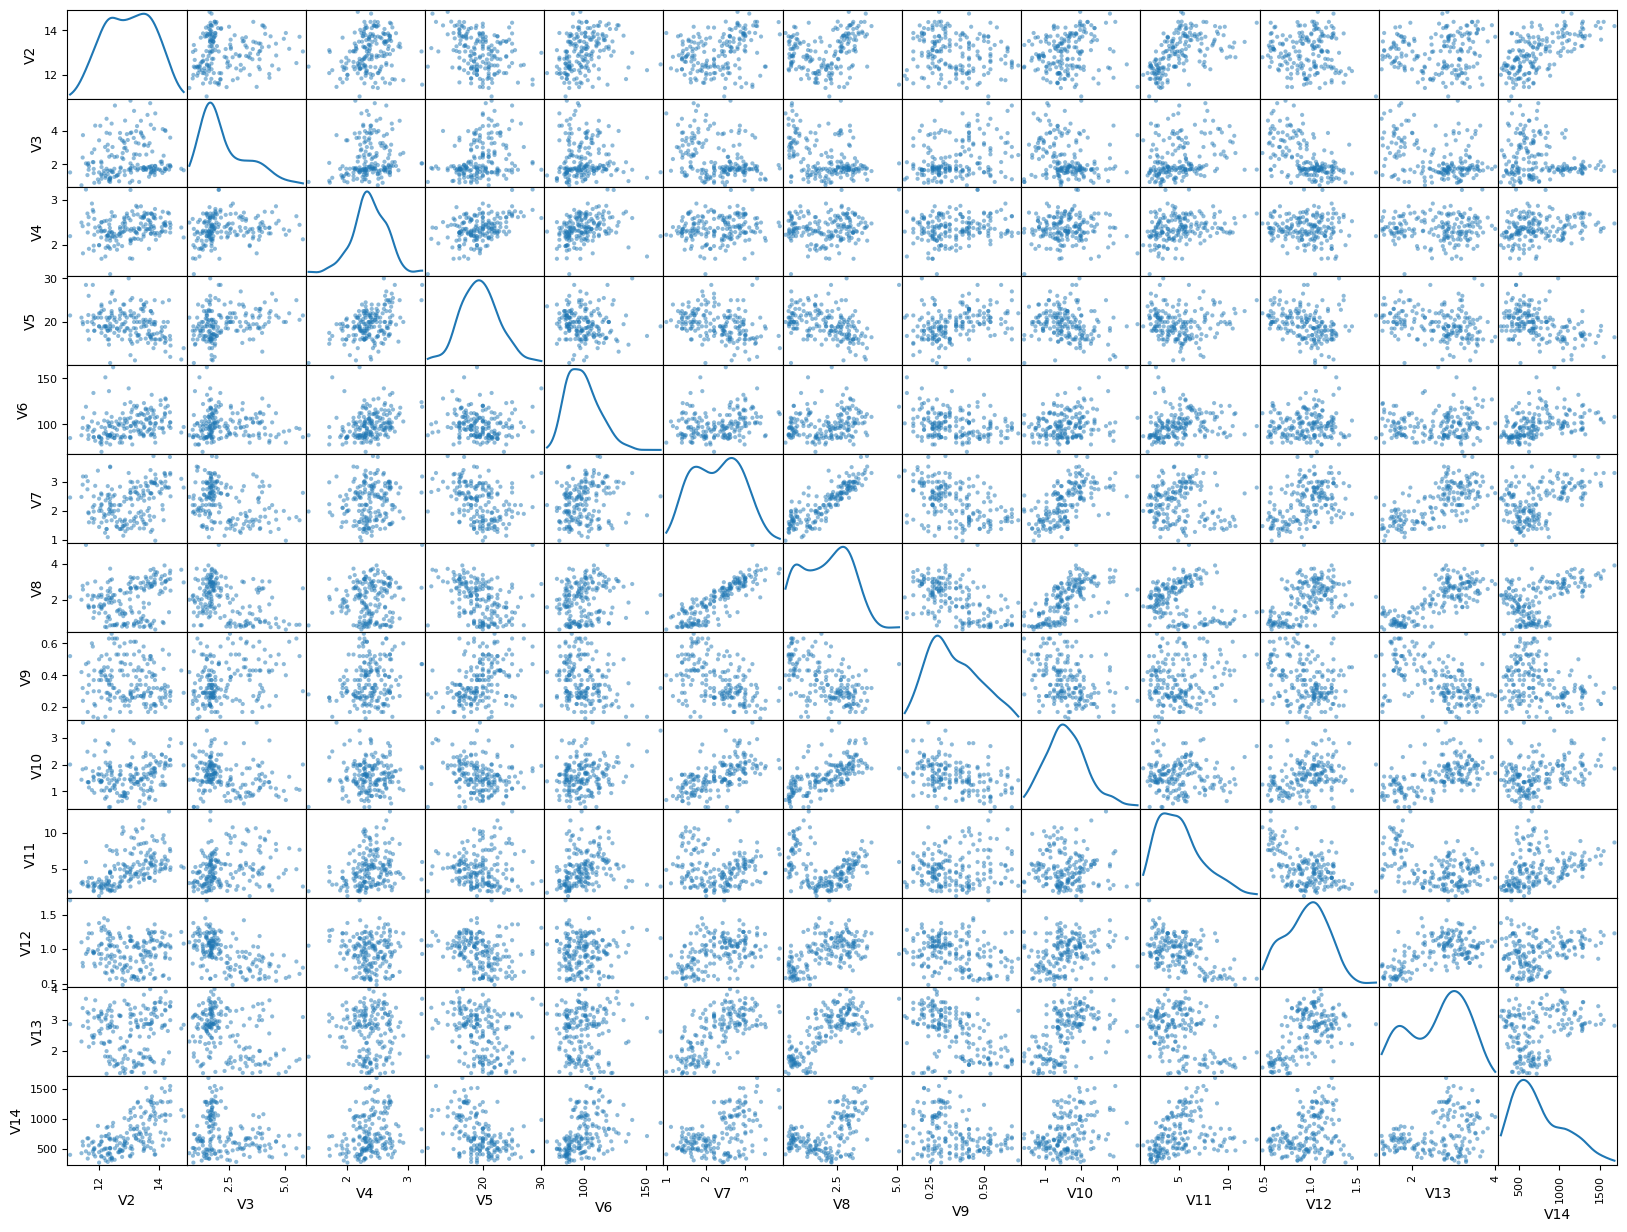

In [6]:
# Matrix Scatterplot
pd.plotting.scatter_matrix(data.loc[:, "V2":"V14"], diagonal="kde",figsize=(20,15))
plt.show()

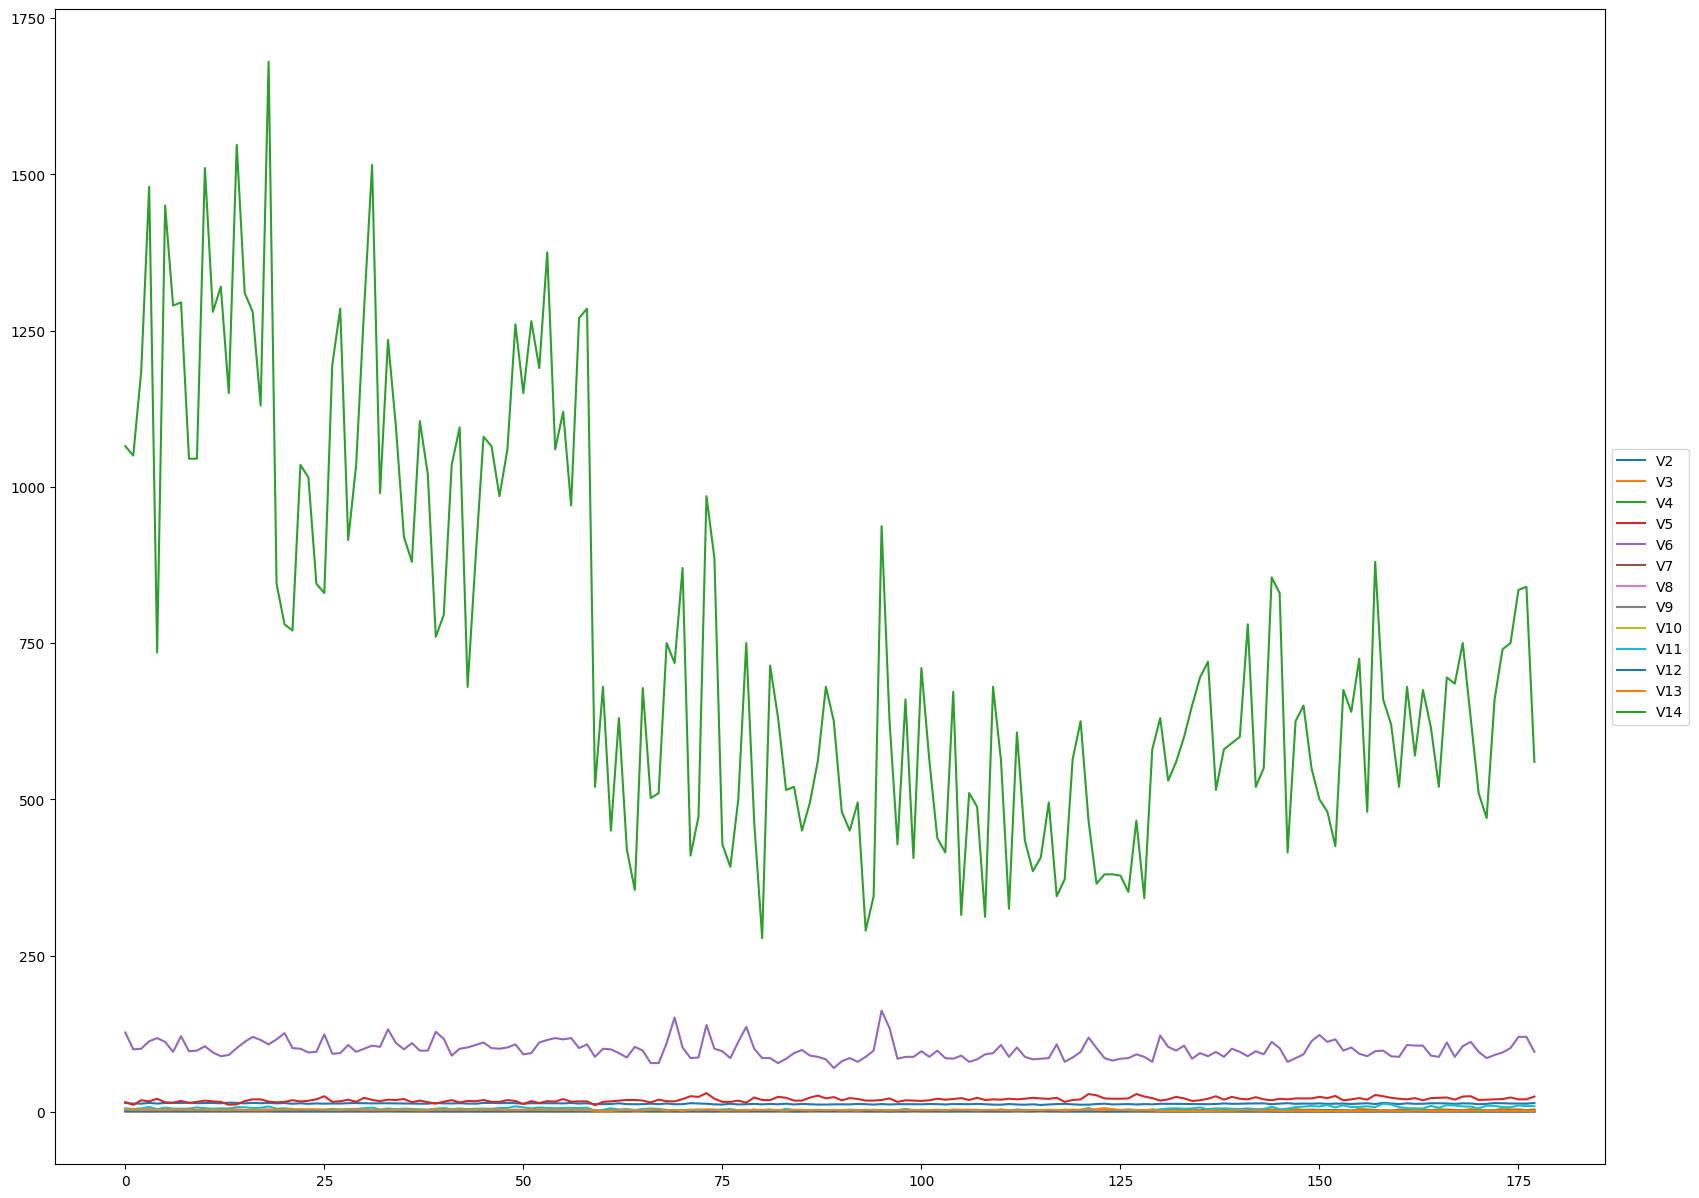

In [7]:
ax = data[["V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

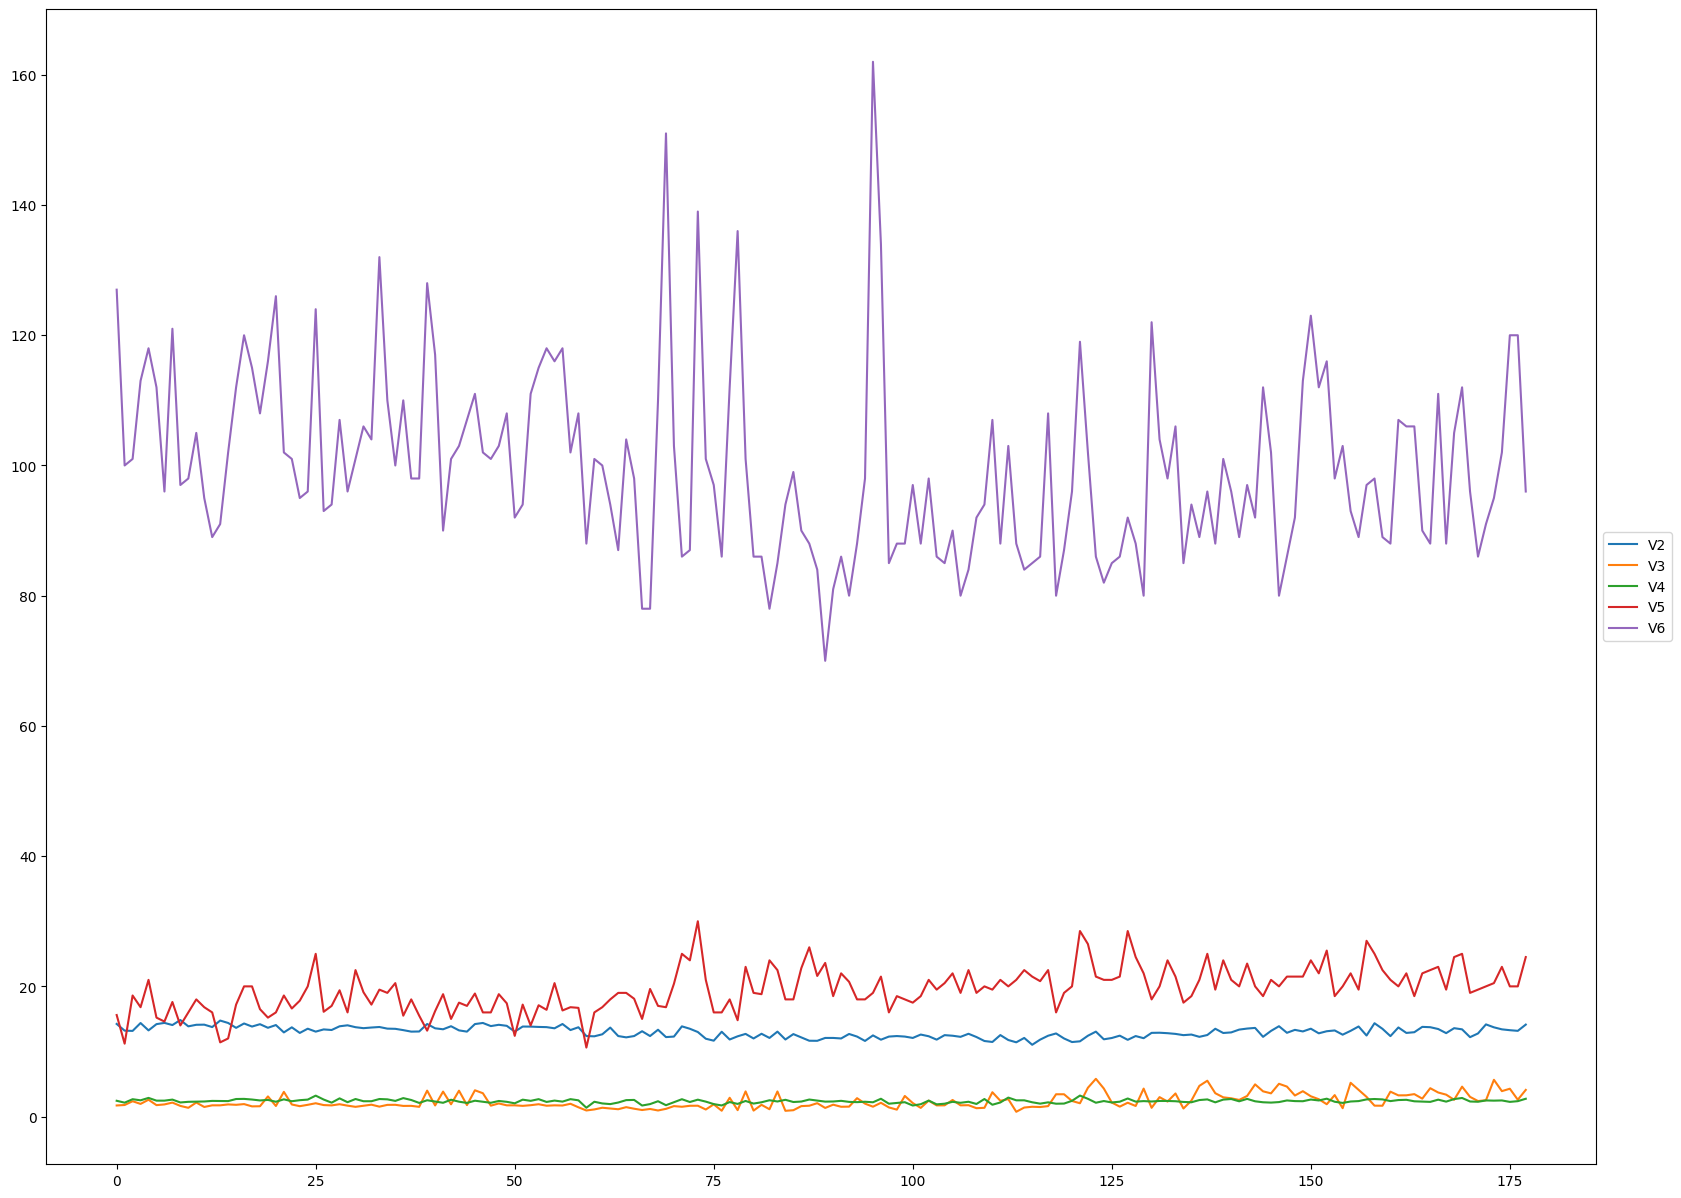

In [8]:
ax = data[["V2","V3","V4","V5","V6"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Calculating Summary Statistics for Multivariate Data

In [9]:
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [10]:
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

In [11]:
X.apply(np.max)

V2       14.83
V3        5.80
V4        3.23
V5       30.00
V6      162.00
V7        3.88
V8        5.08
V9        0.66
V10       3.58
V11      13.00
V12       1.71
V13       4.00
V14    1680.00
dtype: float64

In [12]:
X.apply(np.min)

V2      11.03
V3       0.74
V4       1.36
V5      10.60
V6      70.00
V7       0.98
V8       0.34
V9       0.13
V10      0.41
V11      1.28
V12      0.48
V13      1.27
V14    278.00
dtype: float64

Standardising Variables¶


In [13]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [14]:
standardisedX.apply(np.mean)

V2    -8.382808e-16
V3    -1.197544e-16
V4    -8.370333e-16
V5    -3.991813e-17
V6    -3.991813e-17
V7     0.000000e+00
V8    -3.991813e-16
V9     3.592632e-16
V10   -1.197544e-16
V11    2.494883e-17
V12    1.995907e-16
V13    3.193450e-16
V14   -1.596725e-16
dtype: float64

In [15]:
standardisedX.apply(np.std)

V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64

Principal Component Analysis

In [16]:
pca = PCA().fit(standardisedX)

In [17]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [18]:
summary = pca_summary(pca, standardisedX)

Importance of components:


/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


In [19]:
summary.sdev

,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


In [20]:
summary.sdev**2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


How Many Principal Components to Retain

/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


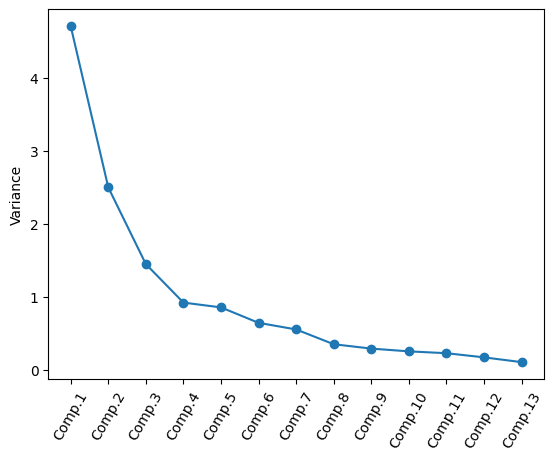

In [21]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
screeplot(pca, standardisedX)

Linear Discriminant Analysis¶
The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables that gives the best possible separation between the groups in data set. Linear discriminant analysis is also known as canonical discriminant analysis, or simply discriminant analysis.

In [22]:
lda = LinearDiscriminantAnalysis().fit(X, y)

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [24]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,-0.403400,0.871793
V3,0.165255,0.305380
V4,-0.369075,2.345850
V5,0.154798,-0.146381
V6,-0.002163,-0.000463
V7,0.618052,-0.032213
V8,-1.661191,-0.491998
V9,-1.495818,-1.630954
V10,0.134093,-0.307088
V11,0.355056,0.253231


In [25]:
lda.scalings_[:, 0]

array([-0.40339978,  0.1652546 , -0.36907526,  0.15479789, -0.0021635 ,
        0.61805207, -1.66119123, -1.49581844,  0.13409263,  0.35505571,
       -0.81803607, -1.15755938, -0.00269121])

# 2 - Multivariate Analysis

In [26]:
df_train = pd.read_csv("../TP3/input/houses.csv")
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

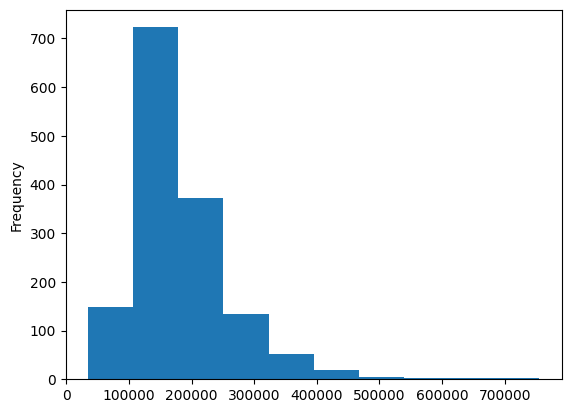

In [28]:
df_train['SalePrice'].plot(kind="hist")

/var/folders/rs/wmb9tlw54_57w8bqd4qxp_zh0000gn/T/ipykernel_84943/4128568413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit = norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

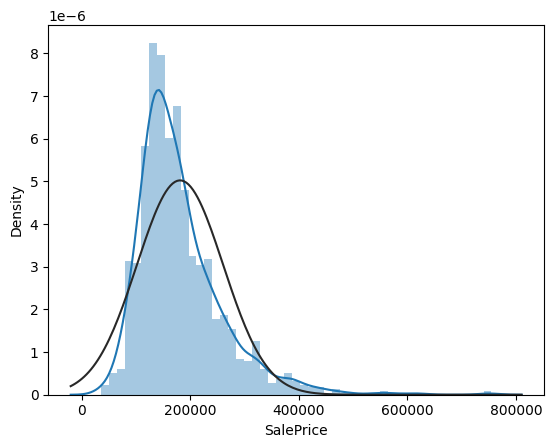

In [29]:
sns.distplot(df_train['SalePrice'], fit = norm)

Bivariate analysis

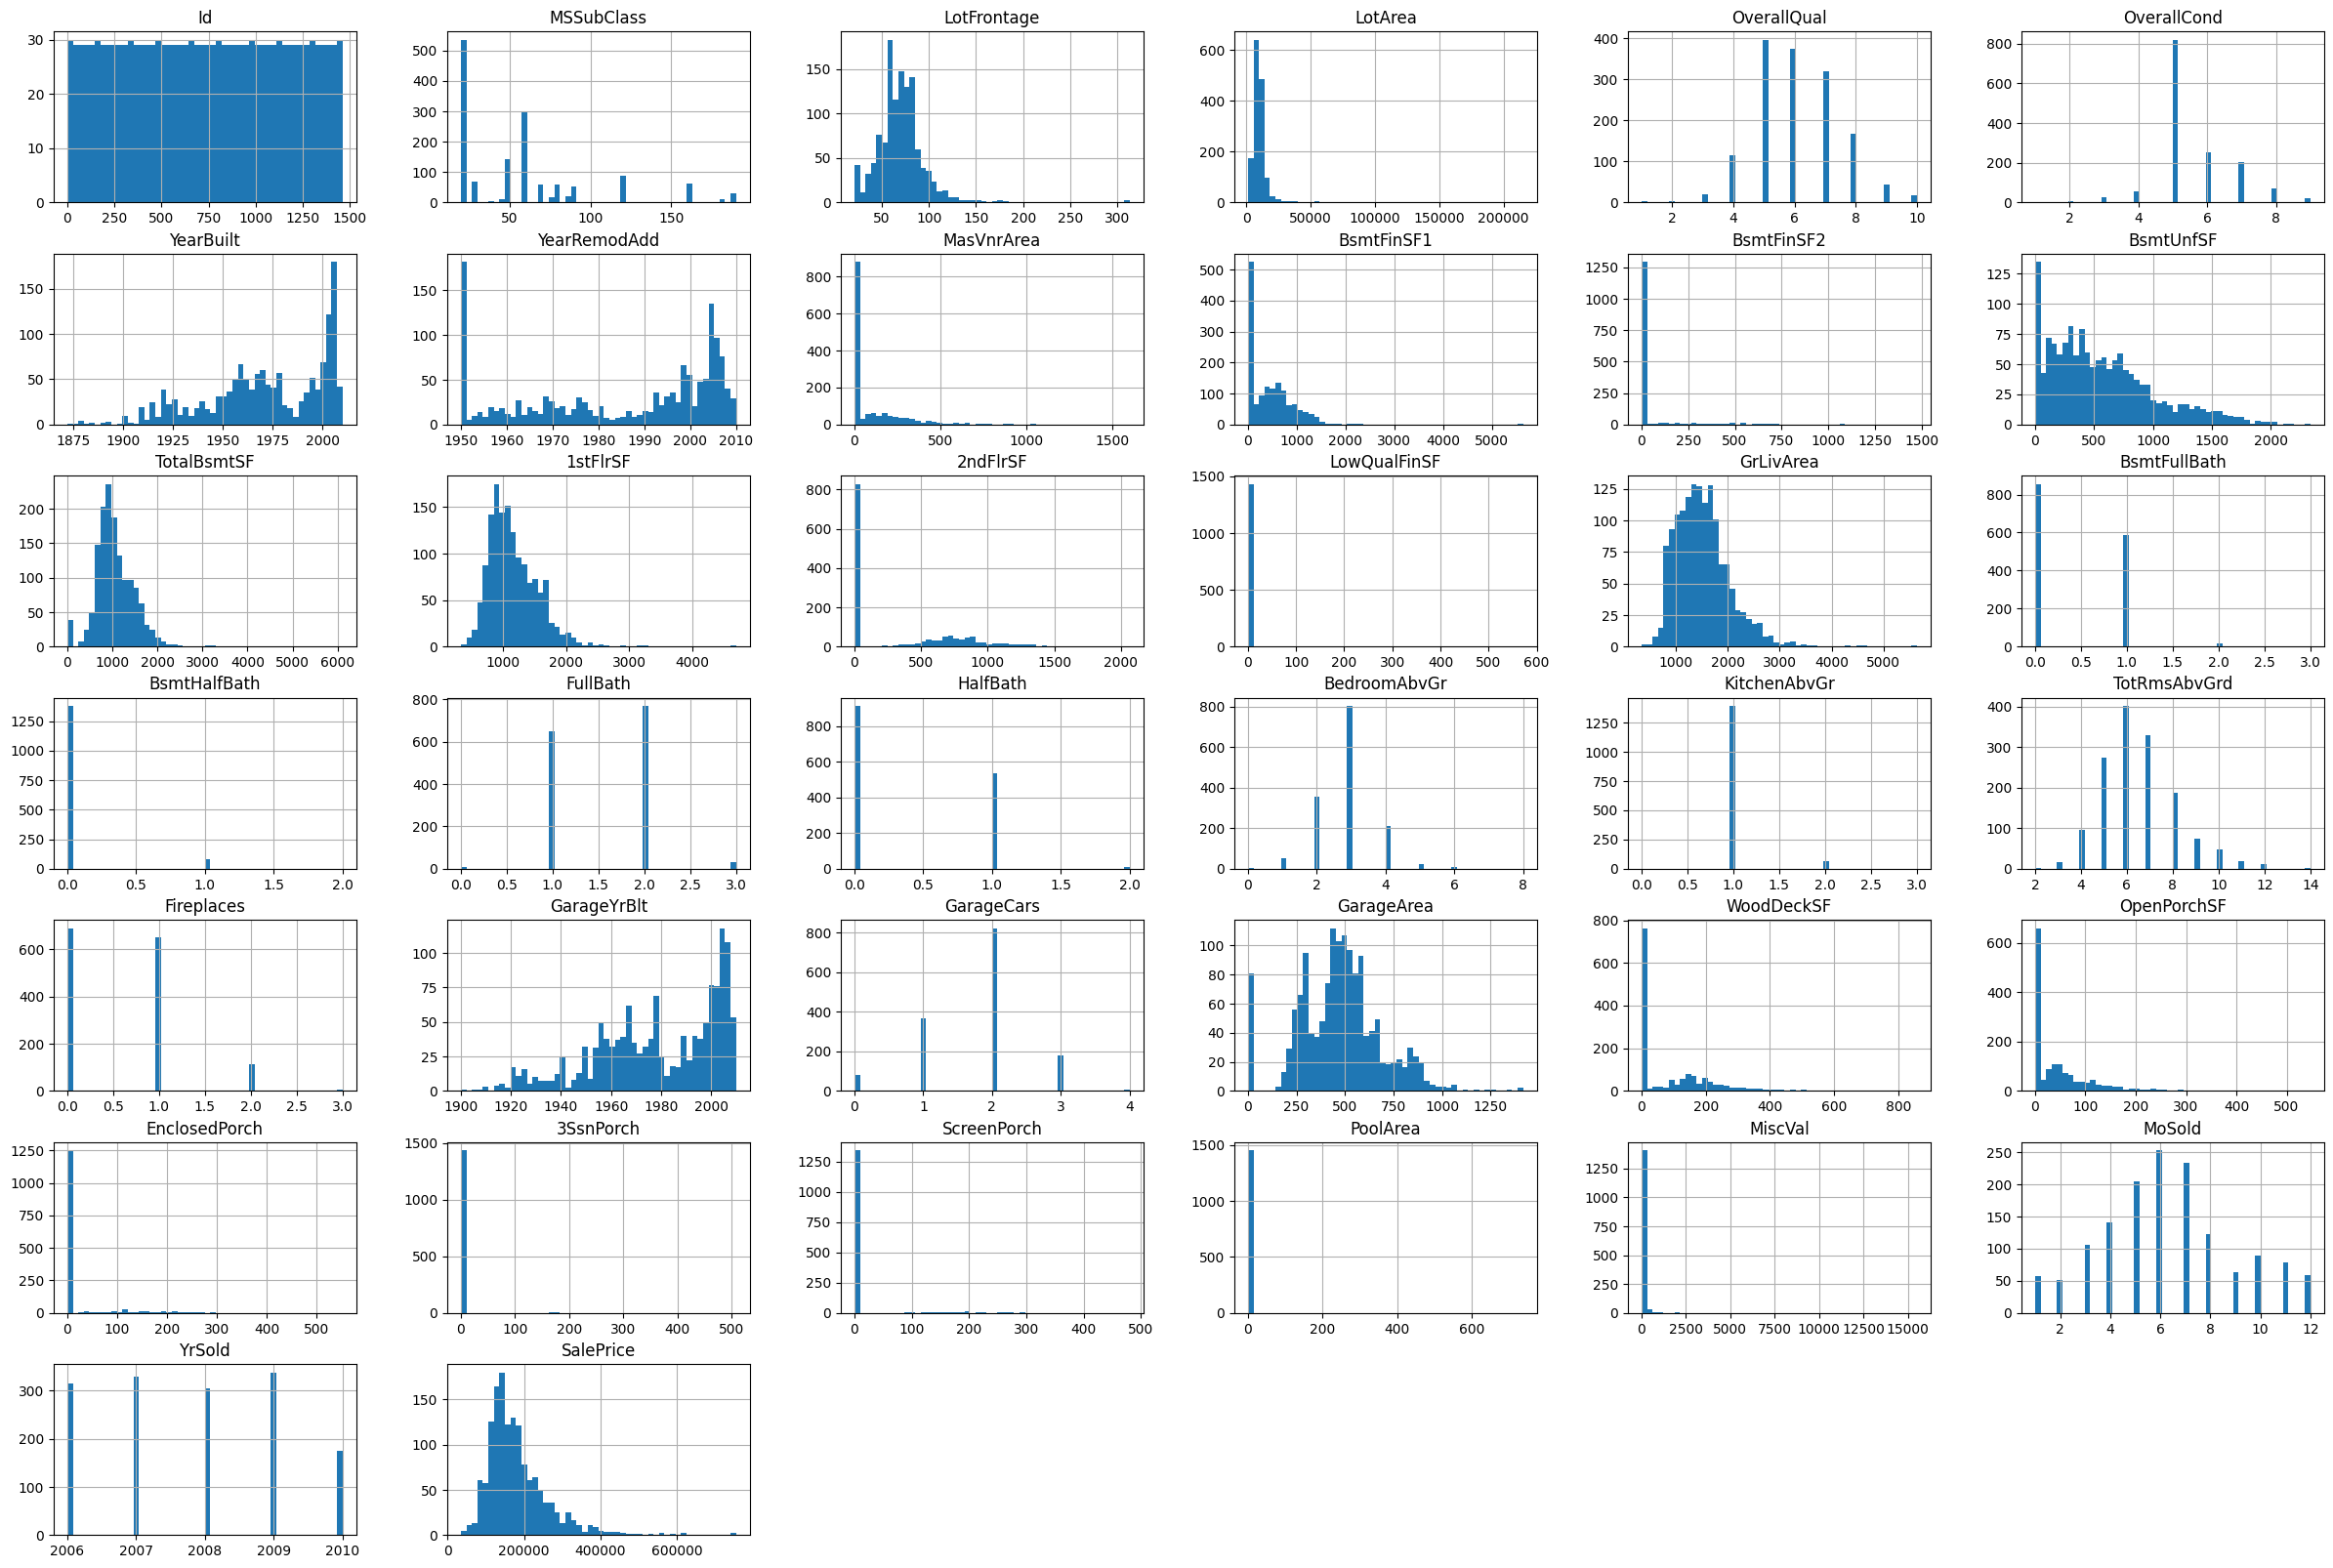

In [30]:
df_train.hist(bins=50, figsize=(30,20));

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

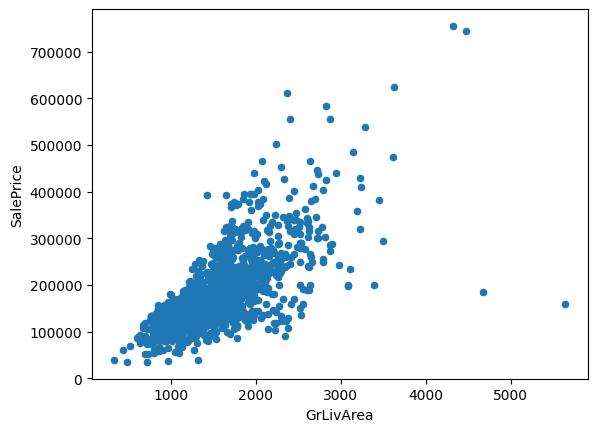

In [31]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

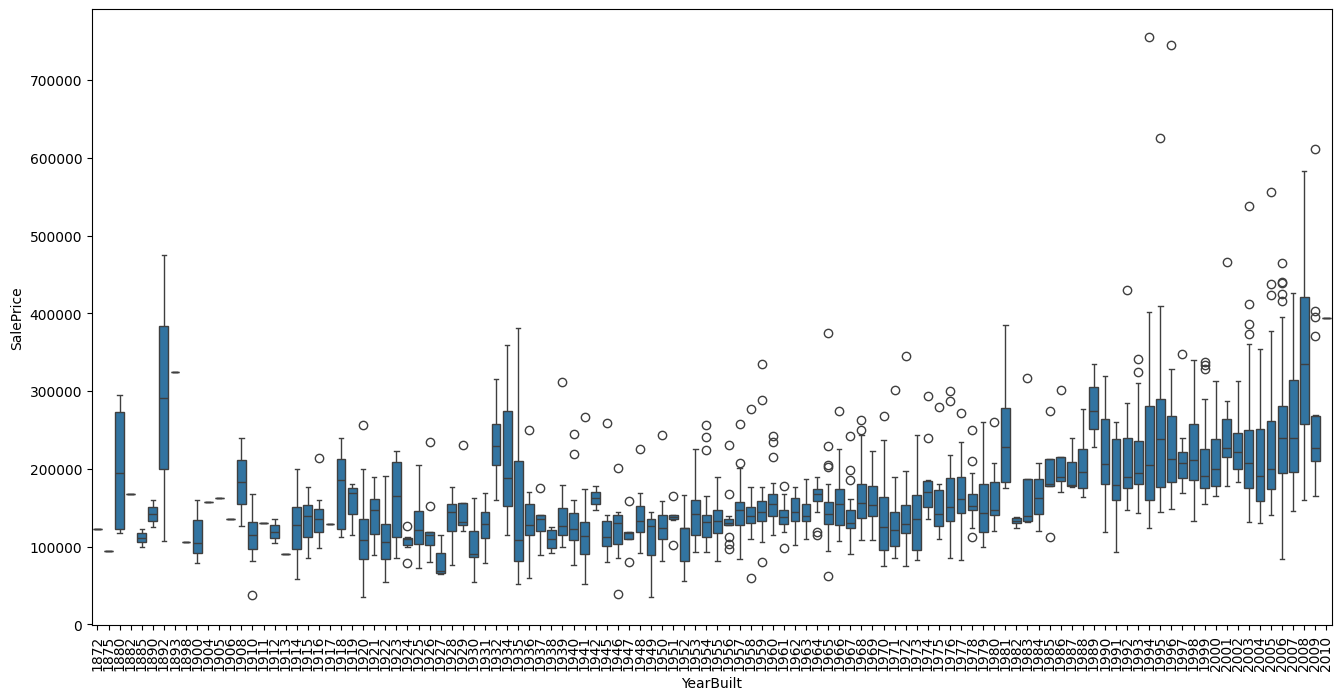

In [32]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90)

/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


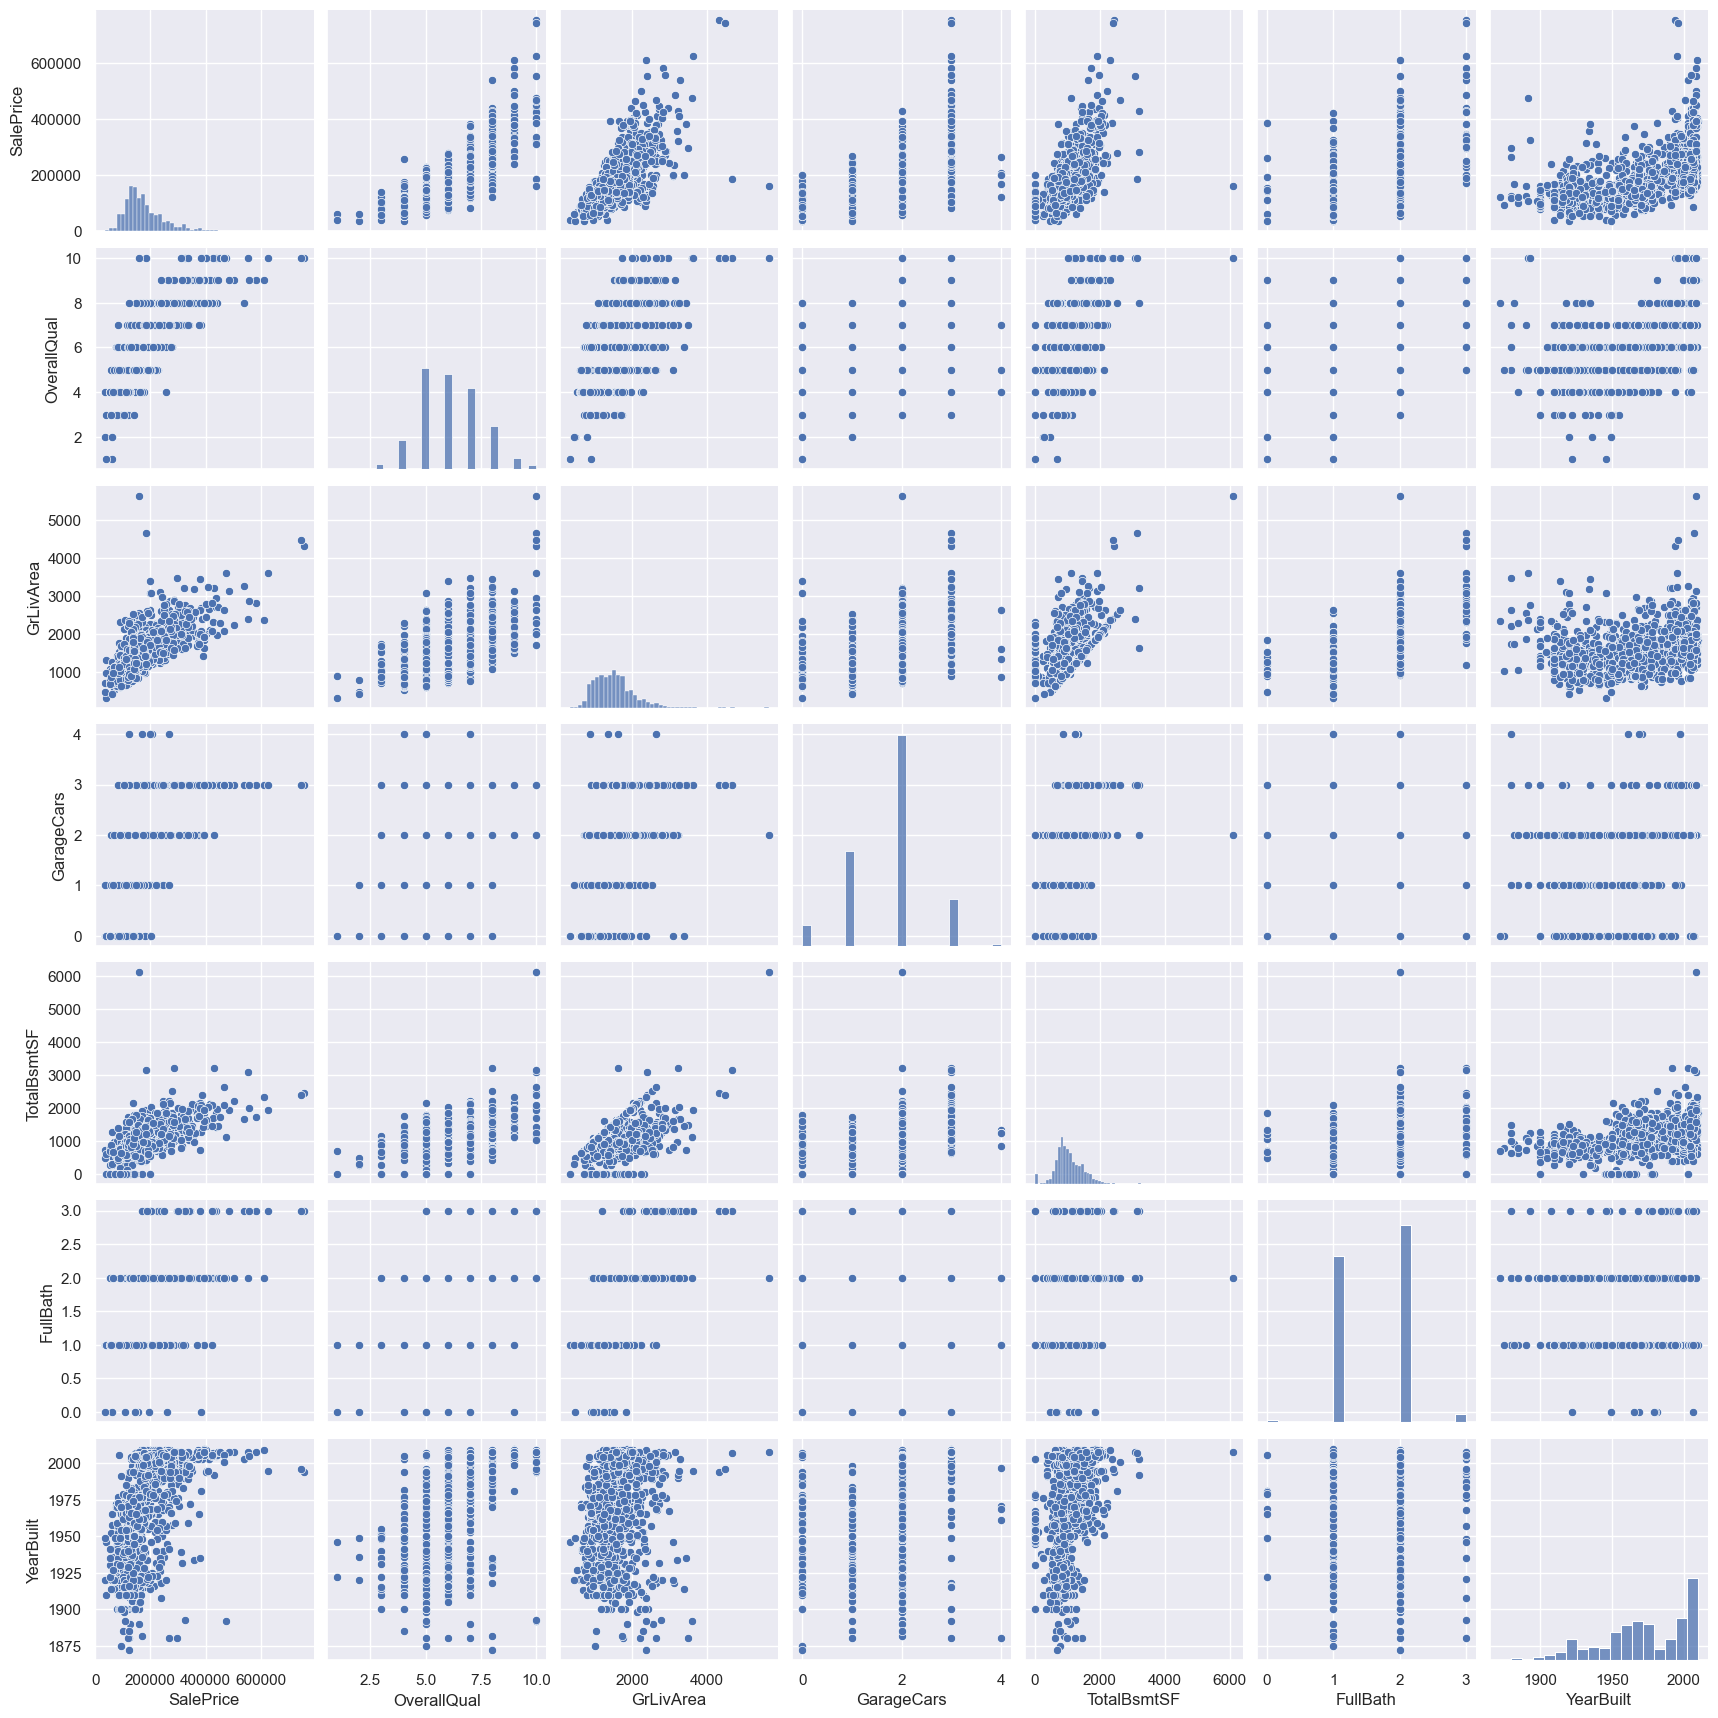

In [33]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Exercise: create a correlation matrix

# 3 - K-Means Clustering

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [35]:
# Load the data
country_data=pd.read_csv("../TP3/input/Country.csv")
country_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


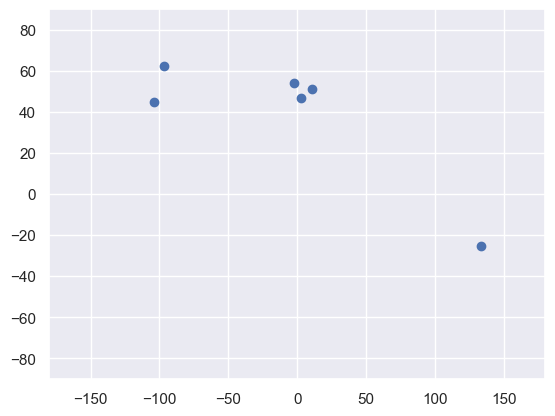

In [36]:
plt.scatter(country_data['Longitude'], country_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [37]:
# Clustering
# Slicing the data to get the Latitude and Longitude Columns
x = country_data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [38]:
# Instantiating a new model with 3 clusters
kmeans = KMeans(3)
clusters = kmeans.fit_predict(x)

In [39]:
data_with_clusters = country_data.copy()

# Assigning the cluster label of each country into the new dataFrame
data_with_clusters['Clusters'] = clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


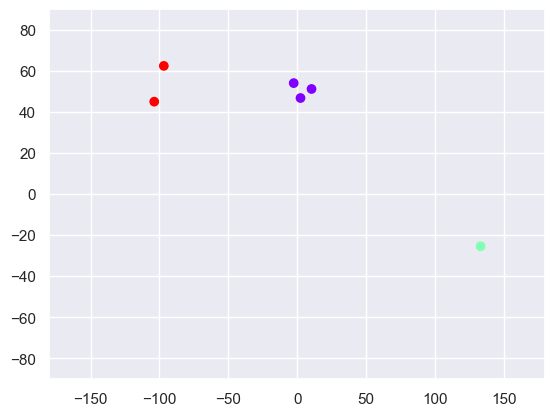

In [40]:
# Plotting and Interpreting the results
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

We certainly accomplished a very interesting resulting here. As we defined a model with 3 clusters, the Kmeans model split the data into three clusters.

 {Canada, USA}, 
 {Australia} and 
 {France, UK, Germany}.

We can interpret each cluster as a continent. As we only used the coordinates as features, the model assigned each country to its corresponding continent.

Changing the approach
Also, one could analyze the dataset with respect to the language column. As the language column records are object types, before fit the model we must map the languages names into numbers!

In [41]:
data_mapped = country_data.copy()
data_mapped['Language'] = country_data['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [42]:
# Slicing the dataframe, fitting and predicting
feature = data_mapped.iloc[:,3:4]
clusters = kmeans.fit_predict(feature)

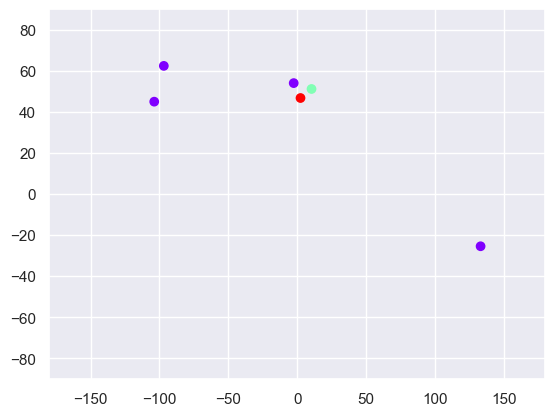

In [43]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

This time our result was very distinct from the first one. Now the clusters do not represent the continent of a set of countries but the language spoken in each of them. This is expected as we used only the language as the only feature of the model.

# 4 - Multivariate Analysis of Variance
MANOVA (Multivariate Analysis of Variance) is an extension of ANOVA that can simultaneously analyse the relationship between multiple dependent variables and one or more independent variables. It helps determine if changes in independent variables result in significant changes in multiple dependent variables.

In [47]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA # Importing MANOVA

# Sample data
data = pd.DataFrame({'Group': ['A', 'A', 'B', 'B'],
                     'X1': [5, 7, 9, 11],
                     'X2': [15, 18, 25, 30]})

# Perform MANOVA
manova = MANOVA.from_formula('X1 + X2 ~ Group', data=data)
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept         Value  Num DF Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda  0.0168 2.0000 1.0000 29.2500 0.1296
         Pillai's trace  0.9832 2.0000 1.0000 29.2500 0.1296
 Hotelling-Lawley trace 58.5000 2.0000 0.5000 14.6250 0.3601
    Roy's greatest root 58.5000 2.0000 1.0000 29.2500 0.1296
------------------------------------------------------------
                                                            
------------------------------------------------------------
         Group           Value  Num DF Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda  0.0714 2.0000 1.0000  6.5000 0.2673
         Pillai's trace  0.9286 2.0000 1.0000  6.5000 0.2673
 Hotelling-Lawley trace 13.0000 2.0000 0.5

The Wilki’s lambda test evaluates the significance of group difference across several dependent variables. A lower Wilk’s Lambda value suggest more evidence of group difference.

The Pillai’s Trace test statistics is not statistically significant and indicates that Group has no statistically significant association with all the listed elements.

# 5 - Regression Analysis
Regression analysis aims to model the relationship between a dependent variable and independent variables (one or more). 
It helps to predict the value of the dependent variable based on the values of the independent variables.

In [48]:
import numpy as np
import statsmodels.api as sm # Import stat-Model API

x = np.array([2, 4, 6, 8, 10])
y = np.array([5, 9, 12, 15, 18])

# Simple Linear Regression
x = sm.add_constant(x)  # Adding a constant for intercept
model = sm.OLS(y, x).fit()
print(model.summary())

# Multiple Linear Regression
x = np.array([[2, 3], [4, 4], [6, 5], [8, 6], [10, 7]])
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     768.0
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           0.000103
Time:                        23:56:24   Log-Likelihood:               -0.78037
No. Observations:                   5   AIC:                             5.561
Df Residuals:                       3   BIC:                             4.780
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.383      5.745      0.0

/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/


https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a


#6 - Another PCA example
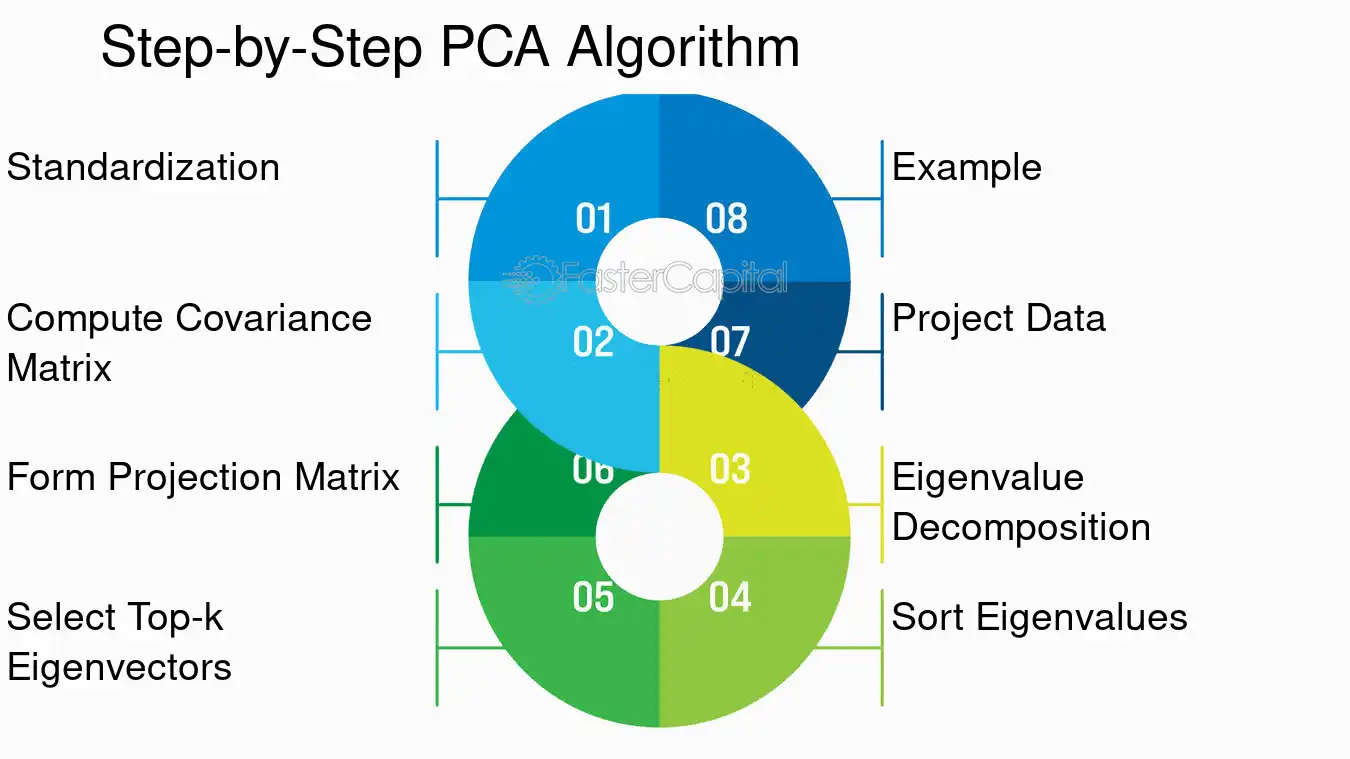

In [49]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)


Original Dataframe shape : (569, 31)
Inputs Dataframe shape   : (569, 30)


In [50]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


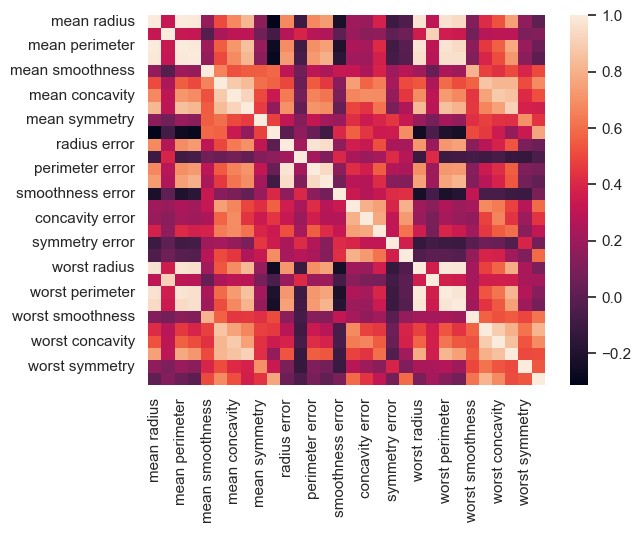

In [51]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


In [52]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [13.28160768  5.69135461  2.81794898  1.98064047  1.64873055  1.20735661
  0.67522011  0.47661714  0.41689481  0.35069346  0.2939157   0.26116137
  0.2413575   0.15700972  0.09413497  0.0798628   0.05939904  0.05261878
  0.04947759  0.00013304  0.0007488   0.00158934  0.00690046  0.00817764
  0.01548127  0.01805501  0.02434084  0.0274394   0.0311594   0.02997289]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.

In [53]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [54]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Determine the Number of Principal Components 
Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%. Let’s check how many principal components come into this.

In [55]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


np.int64(2)

In [56]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/guilhermealves/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


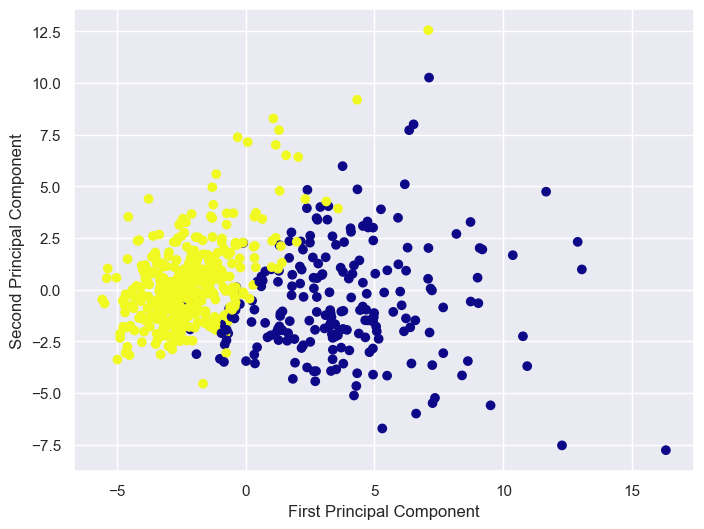

In [57]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=cancer['target'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
